In [79]:
from sympy.stats.sampling.sample_numpy import numpy
%reset
%load_ext autoreload
%autoreload 2

Nothing done.


In [80]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
!python --version

Python 3.12.10


In [81]:
import os
from pathlib import Path
from ct_dataset import CTDataset

number_of_ct_patients = 10
job_dir = os.getcwd()
data_path = "datasets/"

path_to_dataset = f"{job_dir}/{data_path}/liver_dataset_{number_of_ct_patients}.npz"



['liver_0' 'liver_1' 'liver_2' 'liver_3' 'liver_4' 'liver_5' 'liver_6'
 'liver_7' 'liver_8' 'liver_9']
Len (X, Y, Patients): 10 10 10
Sample Patient Shapes (liver_2): X[2] Y[2]: (139, 256, 256, 1) (139, 256, 256, 1)
Splits by patients:
6 2 2
Train Shape:  (1020, 256, 256, 1) Validation Shape:  (279, 256, 256, 1) Test Shape:  (208, 256, 256, 1)
Train Processed 0/1020
Train Processed 50/1020
Train Processed 100/1020
Train Processed 150/1020
Train Processed 200/1020
Train Processed 250/1020
Train Processed 300/1020
Train Processed 350/1020
Train Processed 400/1020
Train Processed 450/1020
Train Processed 500/1020
Train Processed 550/1020
Train Processed 600/1020
Train Processed 650/1020
Train Processed 700/1020
Train Processed 750/1020
Train Processed 800/1020
Train Processed 850/1020
Train Processed 900/1020
Train Processed 950/1020
Train Processed 1000/1020
Val Processed 0/279
Val Processed 50/279
Val Processed 100/279
Val Processed 150/279
Val Processed 200/279
Val Processed 250/279
Te

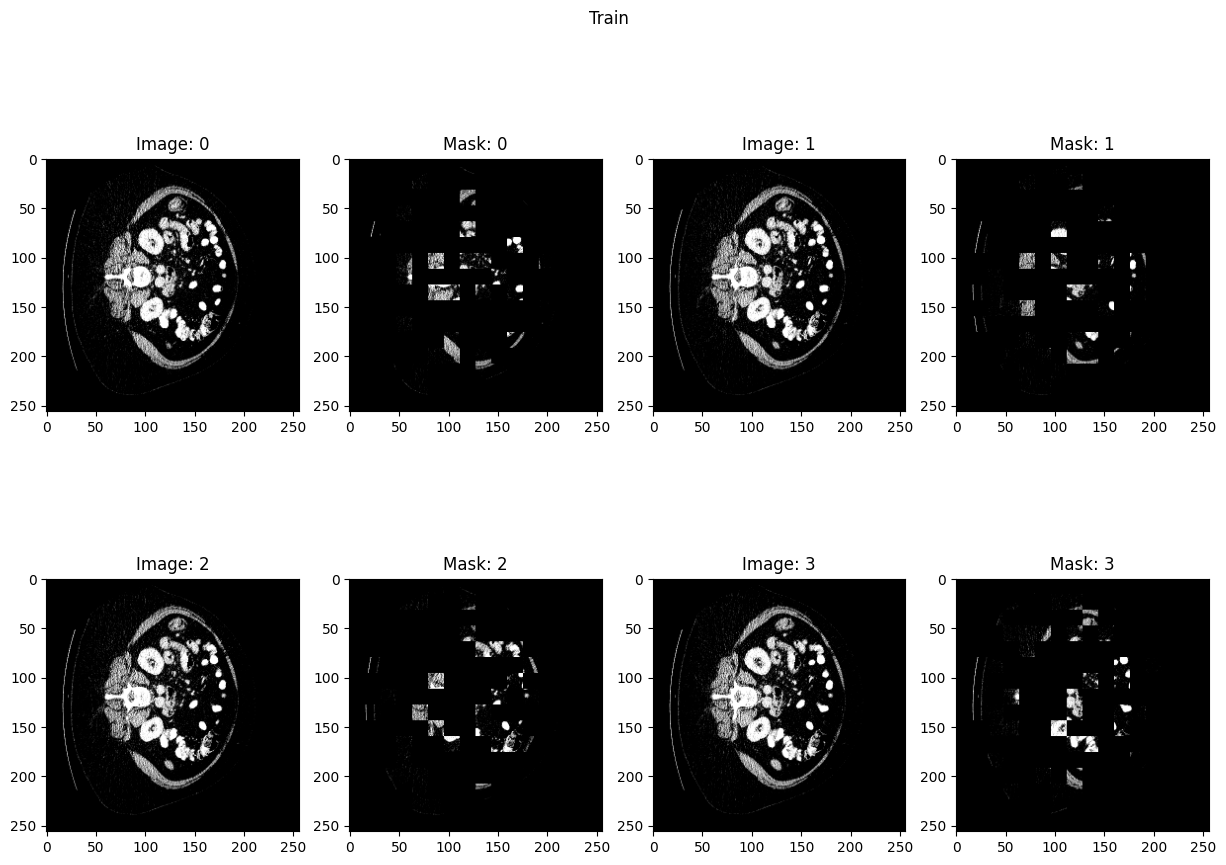

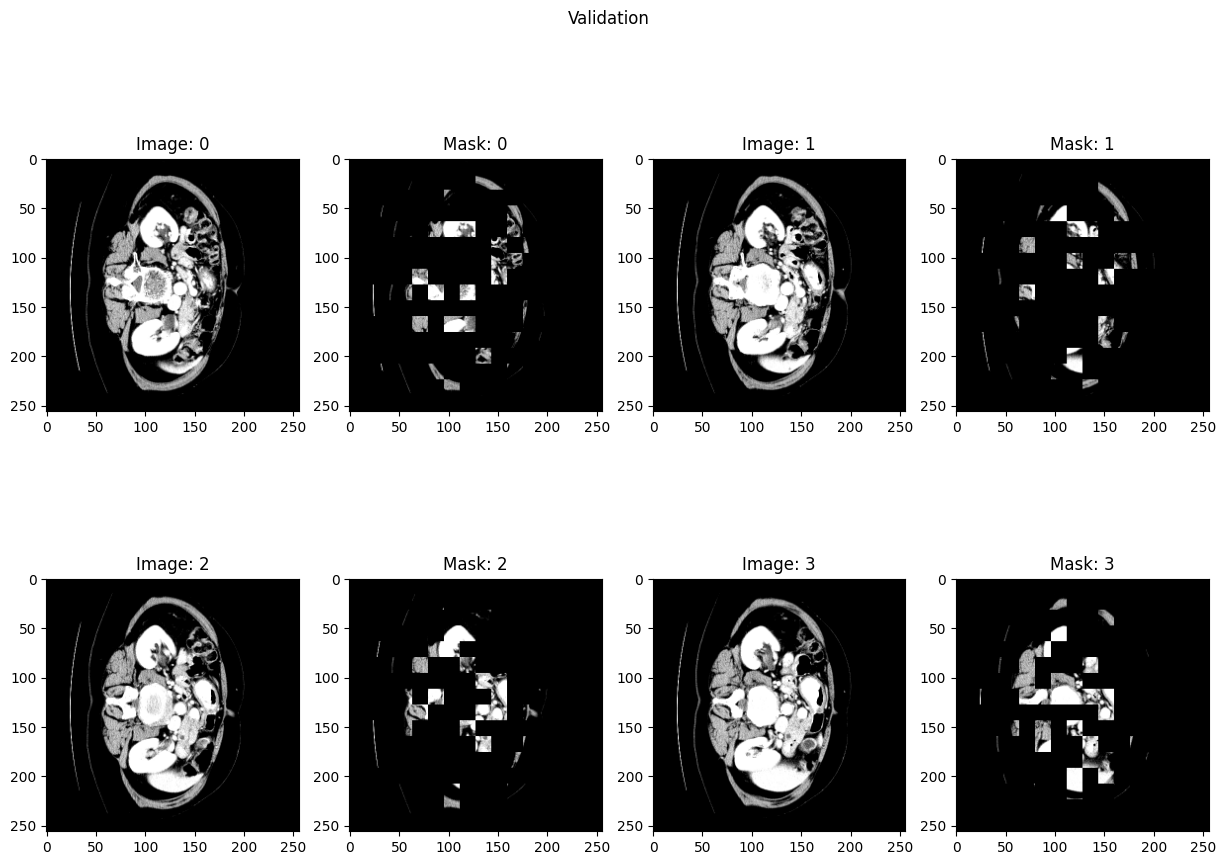

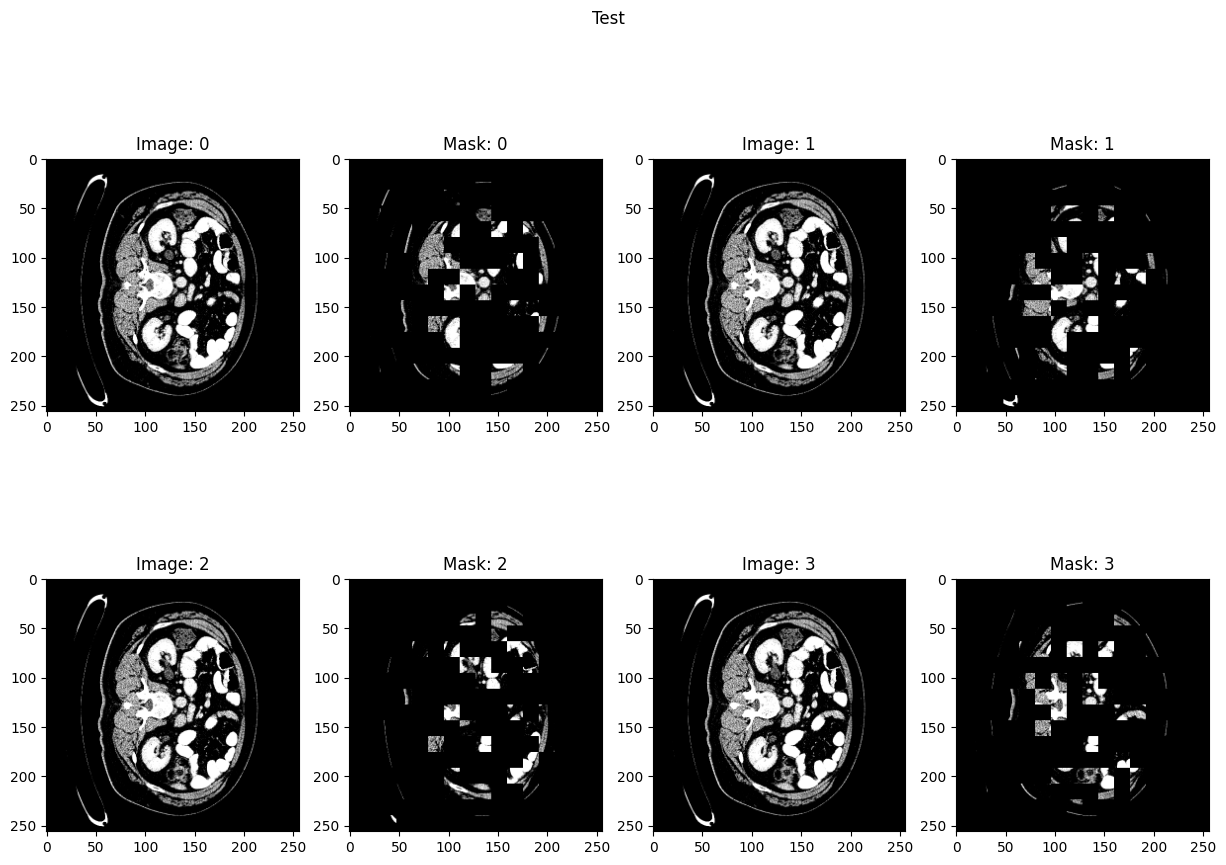

In [82]:
dataset_train = CTDataset(path_to_dataset)
dataset_train.split_train_test(number_of_ct_patients)
dataset_train.mask_and_save()
dataset_train.print_summary()
dataset_train.print_XY_samples()

X_train = dataset_train.X_train_masked
Y_train = dataset_train.X_train
X_val = dataset_train.X_val_masked
Y_val = dataset_train.X_val
X_test = dataset_train.X_test_masked
Y_test = dataset_train.X_test

# Self Supervised using UNet

In [83]:
from UNet_Model.unet_segmentation_pipeline import UNetSegmentationPipeline

# Build and train model
pipeline = UNetSegmentationPipeline(input_shape=(256, 256, 1))

pipeline.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 256, 256,  │        320 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 256, 256,  │      9,248 │ conv2d_33[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 128, 128,  │          0 │ conv2d_34[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_35[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 64, 64,    │          0 │ conv2d_36[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_7[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_37[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_6     │ (None, 128, 128,  │          0 │ conv2d_38[0][0]   │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 128, 128,  │          0 │ up_sampling2d_6[… │
│ (Concatenate)       │ 192)              │            │ conv2d_36[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 128, 128,  │    110,656 │ concatenate_6[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_39[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_7     │ (None, 256, 256,  │          0 │ conv2d_40[0][0]   │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 256, 256,  │          0 │ up_sampling2d_7[… │
│ (Concatenate)       │ 96)               │            │ conv2d_34[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 256, 256,  │     27,680 │ concatenate_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 256, 256,  │      9,248 │ conv2d_41[0][0] 

 Total params: 470,977 (1.80 MB)

 Trainable params: 470,977 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:

epochs = 100
batch_size = 128
history = pipeline.fit(X_train, Y_train, X_val, Y_val, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/100
8/8 - 94s - 12s/step - dice_coef: 0.2884 - iou_metric: 0.1698 - loss: 1.3792 - val_dice_coef: 0.2863 - val_iou_metric: 0.1673 - val_loss: 1.2673
Epoch 2/100
8/8 - 90s - 11s/step - dice_coef: 0.3445 - iou_metric: 0.2091 - loss: 1.1323 - val_dice_coef: 0.4431 - val_iou_metric: 0.2849 - val_loss: 0.9644
Epoch 3/100
8/8 - 113s - 14s/step - dice_coef: 0.4211 - iou_metric: 0.2671 - loss: 1.0290 - val_dice_coef: 0.3761 - val_iou_metric: 0.2318 - val_loss: 0.9649
Epoch 4/100
8/8 - 113s - 14s/step - dice_coef: 0.4430 - iou_metric: 0.2847 - loss: 0.9825 - val_dice_coef: 0.4172 - val_iou_metric: 0.2639 - val_loss: 0.9003
Epoch 5/100
8/8 - 112s - 14s/step - dice_coef: 0.4641 - iou_metric: 0.3023 - loss: 0.9542 - val_dice_coef: 0.4727 - val_iou_metric: 0.3097 - val_loss: 0.8459
Epoch 6/100
8/8 - 109s - 14s/step - dice_coef: 0.4839 - iou_metric: 0.3192 - loss: 0.9107 - val_dice_coef: 0.4904 - val_iou_metric: 0.3252 - val_loss: 0.8051
Epoch 7/100
8/8 - 108s - 14s/step - dice_coef: 0.5215 

In [85]:
test_score = pipeline.evaluate(X_val, Y_val)
print("Validation Dice and IoU:", test_score)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 630ms/step - dice_coef: 0.6118 - iou_metric: 0.4454 - loss: 0.6284
Validation Dice and IoU: [0.6382172703742981, 0.6092231273651123, 0.4406176805496216]


In [86]:
# Saving the pipeline model
model_name = f"UNet_Model/saved_models/unet_ssl_ct_liver_{number_of_ct_patients}.keras"

pipeline.save(model_name)

Model saved to UNet_Model/saved_models/unet_ssl_ct_liver_10.keras


In [87]:
file_history_name = f"UNet_Model/saved_models/unet_ssl_ct_history_{number_of_ct_patients}"
pipeline.save_training_history(history, file_history_name, format="json")

Training history saved to UNet_Model/saved_models/unet_ssl_ct_history_10.json


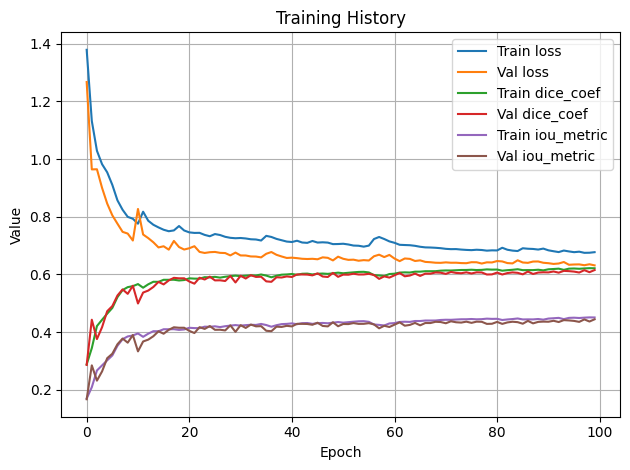

In [88]:
import matplotlib.pyplot as plt

def plot_training_history(history_dict, metrics=("loss", "dice_coef", "iou_metric")):
    """
    Plot training and validation curves for selected metrics.

    Args:
        history_dict: Dict returned from model.history or load_training_history()
        metrics: Tuple of metric names to plot
    """
    for metric in metrics:
        if metric in history_dict:
            plt.plot(history_dict[metric], label=f"Train {metric}")
        val_key = f"val_{metric}"
        if val_key in history_dict:
            plt.plot(history_dict[val_key], label=f"Val {metric}")

    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Training History")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Later or in another script
history_dict = pipeline.load_training_history(file_history_name, format="json")

plot_training_history(history_dict, metrics=("loss", "dice_coef", "iou_metric"))

# plot_training_history(history_dict, metrics=("loss",))

In [89]:
# Load later
from UNet_Model.unet_segmentation_pipeline import UNetSegmentationPipeline

model_name = f"UNet_Model/saved_models/unet_ssl_ct_liver_{number_of_ct_patients}.keras"

pipeline = UNetSegmentationPipeline.load(model_name)

pipeline.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 256, 256,  │        320 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 256, 256,  │      9,248 │ conv2d_33[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 128, 128,  │          0 │ conv2d_34[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 128, 128,  │     18,496 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_35[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 64, 64,    │          0 │ conv2d_36[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 64, 64,    │     73,856 │ max_pooling2d_7[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 64, 64,    │    147,584 │ conv2d_37[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_6     │ (None, 128, 128,  │          0 │ conv2d_38[0][0]   │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 128, 128,  │          0 │ up_sampling2d_6[… │
│ (Concatenate)       │ 192)              │            │ conv2d_36[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 128, 128,  │    110,656 │ concatenate_6[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_40 (Conv2D)  │ (None, 128, 128,  │     36,928 │ conv2d_39[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_7     │ (None, 256, 256,  │          0 │ conv2d_40[0][0]   │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 256, 256,  │          0 │ up_sampling2d_7[… │
│ (Concatenate)       │ 96)               │            │ conv2d_34[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_41 (Conv2D)  │ (None, 256, 256,  │     27,680 │ concatenate_7[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_42 (Conv2D)  │ (None, 256, 256,  │      9,248 │ conv2d_41[0][0] 

 Total params: 1,412,933 (5.39 MB)

 Trainable params: 470,977 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 941,956 (3.59 MB)

# Prediction

In [91]:
import numpy as np

def limit_test_patients(X_test_all, Y_test_all, patient_ids, max_patients=1):
    """
    Limit test data to the first `max_patients` and return concatenated slices with patient IDs.

    Args:
        X_test_all (list of np.ndarray): Test CT volumes per patient
        Y_test_all (list of np.ndarray): Test segmentation masks per patient
        patient_ids (list of str): Patient IDs corresponding to each volume
        max_patients (int): Max number of patients to include in test set

    Returns:
        X_test (np.ndarray): Flattened test images from selected patients
        Y_test (np.ndarray): Flattened test masks from selected patients
        slice_patient_ids (list of str): Slice-level patient ID list
    """
    print("\n####### Enter")
    print(type(X_test_all))
    selected_X = X_test_all[:max_patients]
    selected_Y = Y_test_all[:max_patients]
    selected_ids = patient_ids[:max_patients]

    X_test = np.concatenate(selected_X, axis=0)
    Y_test = np.concatenate(selected_Y, axis=0)

    print("selected_ids: ", selected_ids)
    print("selected_X.shape: ", X_test.shape)

    slice_patient_ids = [
        pid for pid, vol in zip(selected_ids, selected_X) for _ in range(vol.shape[0])
    ]
    print("Len slice_patient_ids: ", len(slice_patient_ids))

    print("####### Exit\n")
    return X_test, Y_test, slice_patient_ids

In [92]:
print("total patients for testing:", len(dataset_train.test_idx))
patient_ids_test = [dataset_train.patient_ids[i] for i in dataset_train.test_idx]
print("patient_ids_test: ", patient_ids_test)

max_patients=5
selected_ids = patient_ids_test[:max_patients]
print("selected_ids: ", selected_ids)
print("X_test.shape: ", X_test.shape)
selected_X = []
selected_X.append(X_test)
slice_patient_ids = [
    pid for pid, vol in zip(selected_ids, selected_X) for _ in range(vol.shape[0])
]

print("Len slice_patient_ids: ", len(slice_patient_ids))
print("slice_patient_ids: ", slice_patient_ids)

total patients for testing: 2
patient_ids_test:  ['liver_8', 'liver_1']
selected_ids:  ['liver_8', 'liver_1']
X_test.shape:  (208, 256, 256)
Len slice_patient_ids:  208
slice_patient_ids:  ['liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_8', 'liver_

In [67]:
# print("total patients for testing:", len(dataset_train.test_idx))
#
# patient_ids_test = [dataset_train.patient_ids[i] for i in dataset_train.test_idx]
#
# X_test_all = [dataset_train.images[i] for i in dataset_train.test_idx]
# Y_test_all = [dataset_train.labels[i] for i in dataset_train.test_idx]
#
# # print("X Test All Shape: " ,len(X_test_all), X_test_all[0].shape, "Y Test All Shape: ", len(Y_test_all), "patient_ids_test: ", len(patient_ids_test))
# print("X Test All Shape: " ,len(X_test_all), "Y Test All Shape: ", len(Y_test_all), "patient_ids_test: ", len(patient_ids_test))
# print("test_idx: ", dataset_train.test_idx)
# print("patient_ids_test: ", patient_ids_test)
# arr = X_test_all[0]
# print("X_test_all[0] shape", arr.shape)
#
# ####################################################
# # we probably care only for slice_patient_ids. The rest we want to take from dataset_train
# print("calling")
# X_test_limited, Y_test_limited, slice_patient_ids = limit_test_patients(X_test_all, Y_test_all, patient_ids_test, max_patients=5)
#
#
# print(X_test_limited.shape, Y_test_limited.shape, len(slice_patient_ids))
# print("slice_patient_ids: ", slice_patient_ids)
#
# print("\n\nPrinting below the SSL Test data which is the masked + orig")
# print("Orig Test X Shape: " ,X_test.shape, "Test Y Shape: ", Y_test.shape, "mm: ", slice_patient_ids)
#
# print("\n\nValidate that the shape of X_test_all is the same as X_test")
# print("We will use X_test and Y_test as test data. The reason is that X_test is a masked slice and Y_test is the original slice.")

In [93]:
from UNet_Model.segmentation_evaluator import SegmentationEvaluator

evaluator = SegmentationEvaluator(pipeline)

# Run full eval
mean_dice, mean_iou, dice_patients, iou_patients = evaluator.evaluate(
    X_test, Y_test, patient_ids=slice_patient_ids
)


Mean Dice score per slice: 0.6906
Mean IoU  score per slice: 0.5303
Mean Dice score per patient: 0.6906
Mean IoU  score per patient: 0.5303


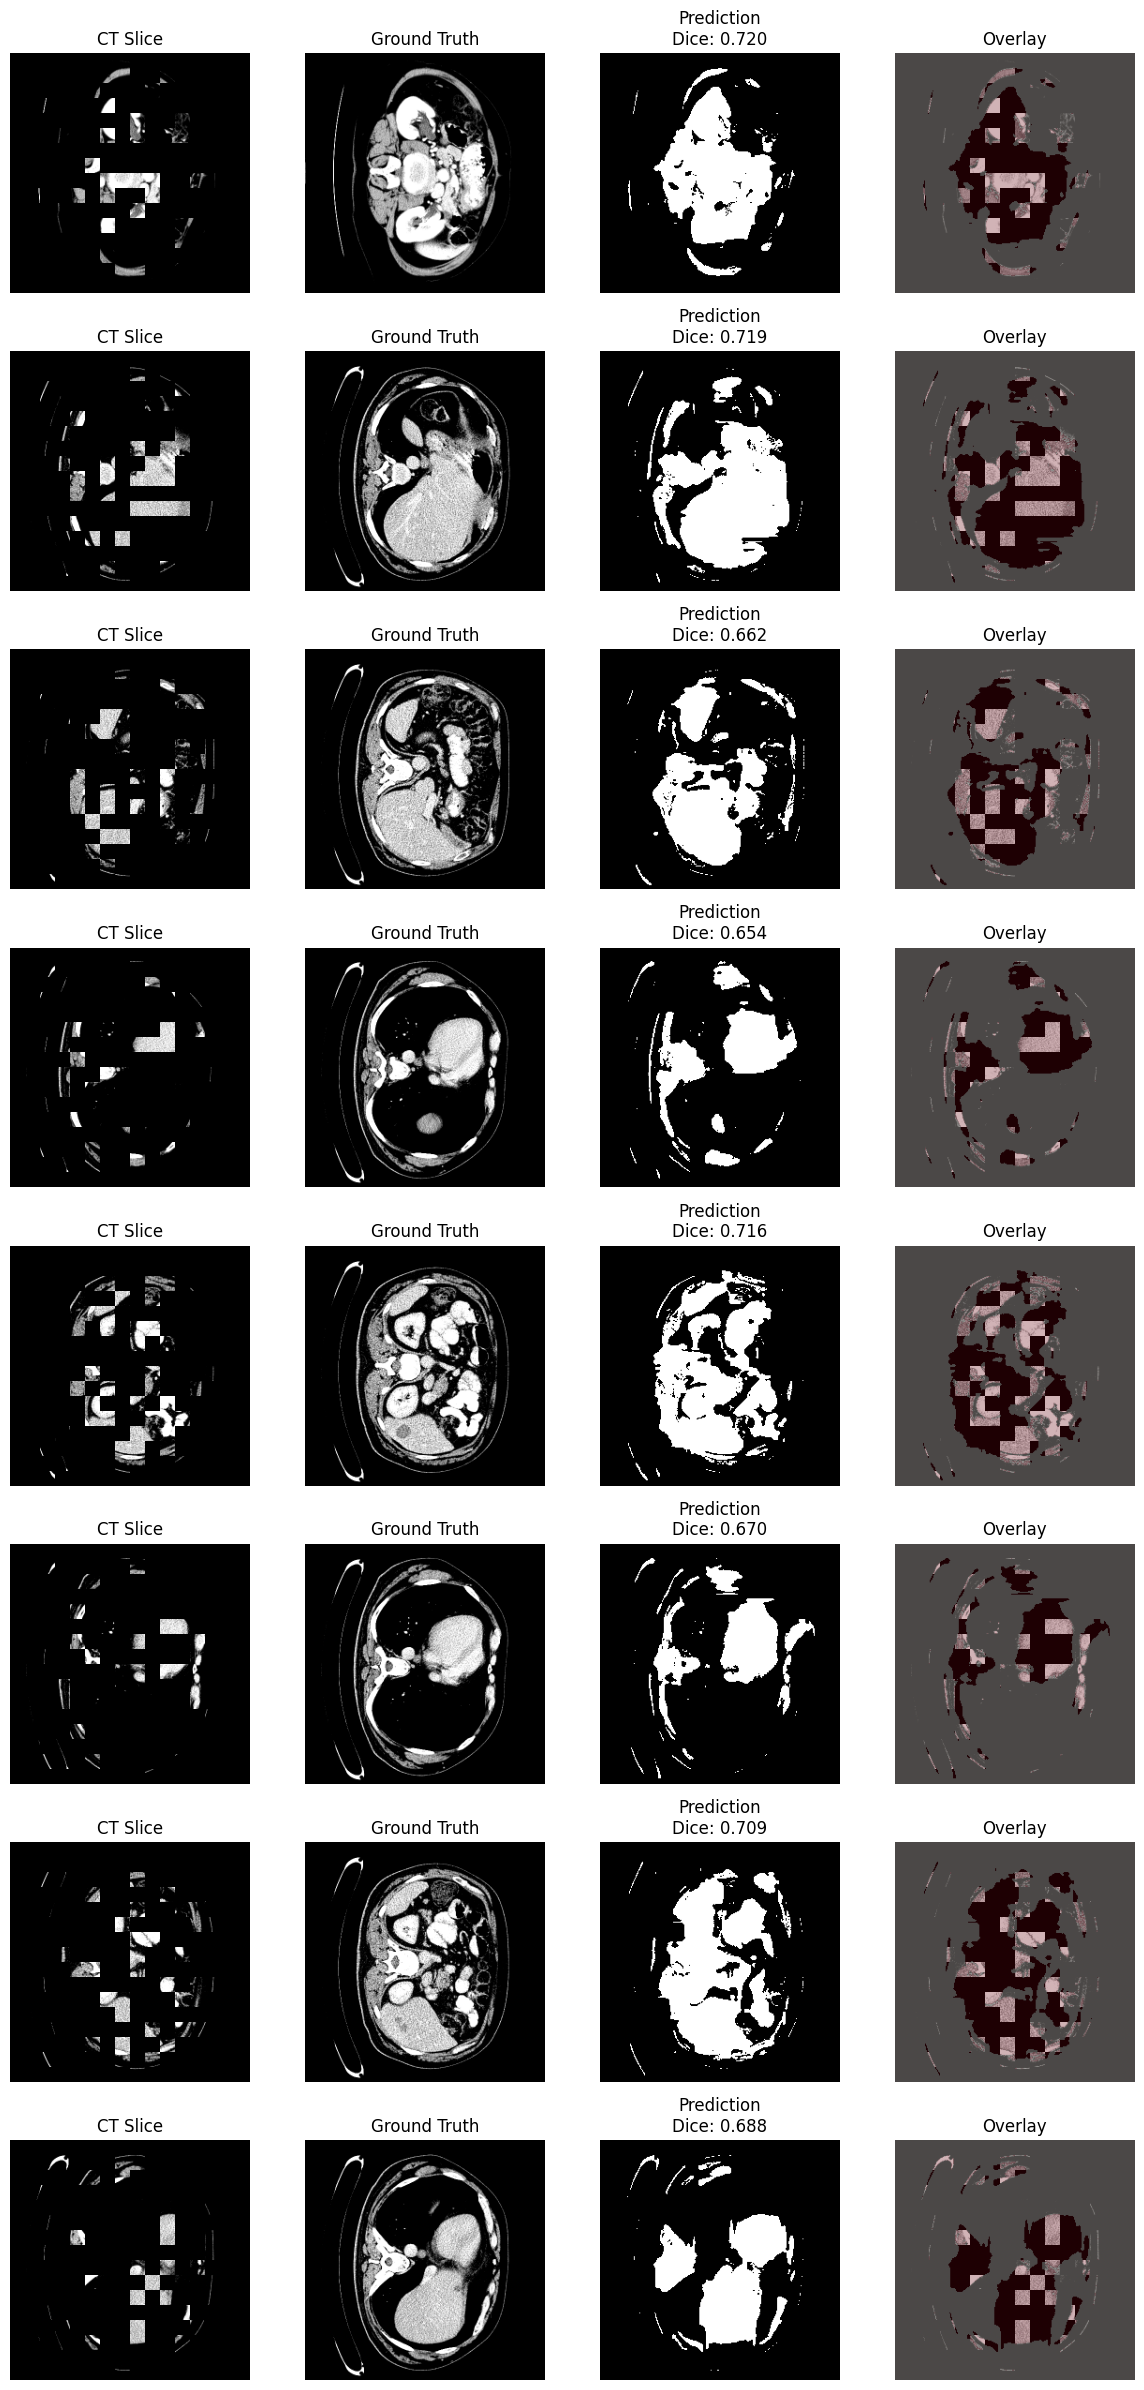

In [94]:
Y_pred = pipeline.predict(X_test)
Y_pred_binary = (Y_pred > 0.5).astype(np.float32)

dice_scores = [evaluator.compute_dice(Y_test[i], Y_pred_binary[i])
               for i in range(len(Y_test))]

evaluator.visualize(X_test, Y_test, Y_pred_binary, dice_scores, num_examples=8)

(29, 256, 256)


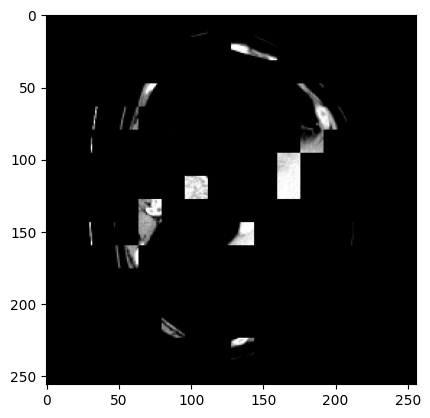

(29, 256, 256, 1)


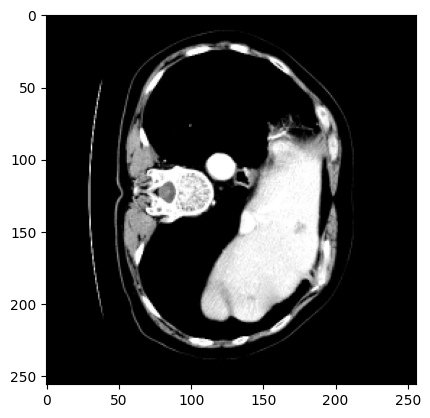

In [76]:
# Take another look at Test data
index = 25
print(X_test.shape)
image = X_test[index]
# image = X_train[0, ..., 0]
plt.imshow(image, cmap='gray')
# # plt.imshow(image.squeeze(), cmap='gray')
plt.show()

print(Y_test.shape)
image = Y_test[index]
# image = X_train[0, ..., 0]
plt.imshow(image, cmap='gray')
# # plt.imshow(image.squeeze(), cmap='gray')
plt.show()